In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from utils import construct, sweep_2, construct_2

In [4]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

In [19]:

agent_1, agent_2, D = construct_2(lr_pB = 0.2,lr_pB_2 = 0.2, factors_to_learn="all")
agent_1.action_selection = "stochastic"
agent_2.action_selection = "stochastic"
agent_1.alpha = 2.0
agent_2.alpha = 2.0
actions_over_time, B1_over_time, q_pi_over_time, qs_over_time = sweep_2(agent_1, agent_2, observation_1 = [0], observation_2 = [0],D=D,T=500)

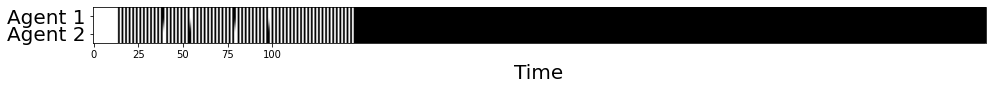

In [20]:

fig, ax = plt.subplots(figsize = (16,5))
ax.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
ax.set_xlabel("Time")
im = ax.imshow(actions_over_time.T,cmap ='gray', aspect = 10, vmin=0, vmax =1)
ax.set_xlabel("Time",fontsize = 20)
ax.set_xticks([0,25,50,75,100],fontsize = 18)
ax.set_yticks([0, 1], labels=["Agent 1", "Agent 2"],fontsize = 20)
plt.show()

In [21]:
actions_over_time_all = np.load('alpha1/actions_over_time_all.npy')
B1_over_time_all = np.load('alpha1/B1_over_time_all.npy')
q_pi_over_time_all = np.load('alpha1/q_pi_over_time_all.npy')

In [22]:
actions_over_time_all = np.load('actions_over_time_all.npy')
B1_over_time_all = np.load('B1_over_time_all.npy')
q_pi_over_time_all = np.load('q_pi_over_time_all.npy')

In [23]:
actions_over_time_all.shape

(200, 2, 15, 15, 100)

In [24]:
def is_oscillatory(vector, num):
    if (vector == np.zeros(vector.shape[0])).all() == True:
        return 0 
    if (vector == np.ones(vector.shape[0])).all() == True:
        return 1
    if ((vector == np.zeros(num))[::2]).all() == True or ((vector == np.ones(num))[::2]).all() == True:
        return 2



In [25]:
steady_state = np.zeros((15,15,3))

In [26]:
oscillations = []

num_oscillations = []
num_c = []
num_d = []

indices = {}
for k in range(15):
    for m in range(15):
        num = 0
        c = 0
        d = 0
        c_indices = []
        d_indices = []
        o_indices = []
        for i, l in enumerate(range(100)):
            o = is_oscillatory(actions_over_time_all[-100:,0,k,m,l], 100)
            if o == 2:
                num += 1 
                o_indices.append(i)
            oscillations.append(o)
            if o == 0:
                c += 1
                c_indices.append(i)
            if o == 1:
                d += 1
                d_indices.append(i)
        indices[k] = {m: [c_indices, d_indices, o_indices]}

        steady_state[k,m] = [num,c,d]

In [27]:
lrs = np.linspace(0,1,10)
alphas = np.linspace(0.1,3.5,10)

In [28]:
lrs = np.linspace(0.0,1.0,15)
alphas = np.linspace(0.01,5.0,15)

In [29]:
steady_state.shape

(15, 15, 3)

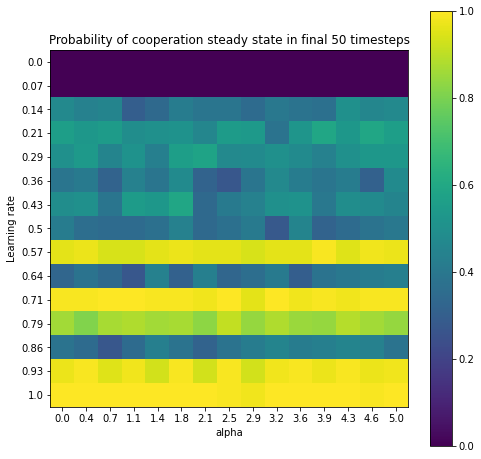

In [32]:
fig = plt.figure(figsize=(8,8))
plt.imshow(steady_state[:,:,1]/100)
plt.yticks(range(15), labels = lrs[:].round(2))
plt.xticks(range(15), labels=alphas.round(1))
plt.ylabel("Learning rate")
plt.xlabel("alpha")
plt.title("Probability of cooperation steady state in final 50 timesteps")
plt.colorbar()

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (14).

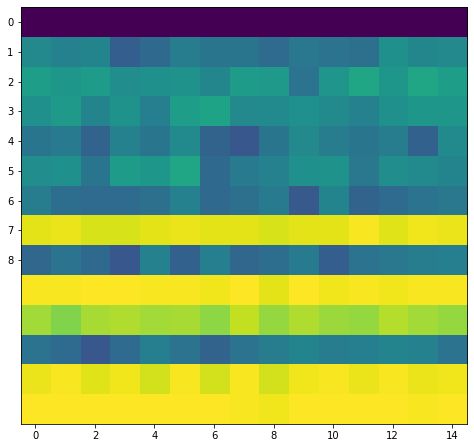

In [31]:
fig = plt.figure(figsize=(8,8))
plt.imshow(steady_state[1:,:,1]/100)
plt.yticks(range(9), labels = lrs[1:].round(1))
plt.xticks(range(10), labels=alphas.round(1))
plt.ylabel("Learning rate")
plt.xlabel("alpha")
plt.title("Probability of cooperation steady state")
plt.colorbar()

In [125]:
q_pi_mean = np.mean(q_pi_over_time_all, axis = -1)

In [133]:
q_pi_mean_alpha = np.mean(q_pi_mean, axis = -2)
q_pi_std_alpha = np.std(q_pi_mean, axis = -2)

In [128]:
q_pi_mean_lr = np.mean(q_pi_mean, axis = -1)

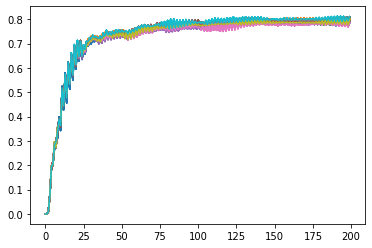

In [135]:
for i in range(10):
    plt.plot(q_pi_mean_alpha[:,0,0])

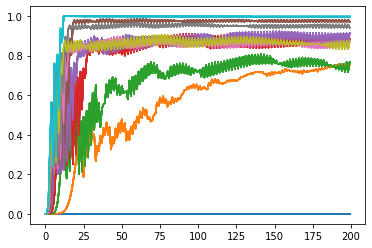

In [132]:
for i in range(10):
    plt.plot(q_pi_mean_lr[:,0,0])